All required packages are imported and the 8 requested neighborhoods are loaded into the 'location_list' python list. 

Required login credientials for the Foursquare API are also saved.

In [25]:
from geopy.geocoders import Nominatim
import folium
import pandas as pd
import requests
import matplotlib.cm as cm
import matplotlib.colors as colors
import numpy as np

CLIENT_ID = '4N2OKUVXD1N1RQYQJOCBRGF1GBGOML5KLC4WV1GNX0JH3U3S' 
CLIENT_SECRET = 'YZSH4L5VMESUMFUXNAP3AIZ10HZPZMKLV05QRGKA40I3JCVX' 
VERSION = '20180605'

location_list = [['Bucktown', 41.926897, -87.676661],
                 'Boystown, Chicago',
                 ['Roscoe Village', 41.943280, -87.679406],
                 'Logan Square, Chicago',
                 'Wicker Park, Chicago',
                 ['Lincoln Park', 41.925913, -87.648806],
                 'Uptown, Chicago',
                 'Near North Side, Chicago',]

Our location list is a combination of hard-coded coordinates and neighborhood names. If just a neighborhood name is identified, the latitude and longitude will be pulled using the following function:

In [10]:
for x, address in enumerate(location_list):
    if type(address) is not list:
        geolocator = Nominatim(user_agent="chi_explorer")
        location = geolocator.geocode(address)
        location_list[x] = [address.split(',')[0], location.latitude, location.longitude]
location_list

[['Bucktown', 41.926897, -87.676661],
 ['Boystown', 41.9438833, -87.6492669],
 ['Roscoe Village', 41.94328, -87.679406],
 ['Logan Square', 41.9285683, -87.7067931],
 ['Wicker Park', 41.9078018, -87.6781551],
 ['Lincoln Park', 41.925913, -87.648806],
 ['Uptown', 41.9666299, -87.6555458],
 ['Near North Side', 41.9000327, -87.6344975]]

The location list is now fully populated.

The following function will take our location list as an input. Using each location, the function will request all of the "food" related businesses from the Foursquare API in a 0.5 mile radius of each location. The function will request a maximum of 150 seperate businesses for each neighborhood. 

The results will be returned as a pandas dataframe object.

In [12]:
def getFoodVenues(location_list, radius=805,limit=50):  
    food_list=[]
    for name, l1, l2 in location_list: 
        # create the API request URL
        for offset in [0,50,100]:
            url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&section=food&limit={}&offset={}'.format(
                CLIENT_ID,CLIENT_SECRET,VERSION, 
                l1,l2, 
                radius, 
                limit,offset)  
            # make the GET request
            results=requests.get(url)
            #print(results)
            results=results.json()["response"]['groups'][0]['items']
            #print(name, len(results))
            for item in results:
                food_list.append([name,l1,l2, 
                item['venue']['name'], 
                item['venue']['id'],
                item['venue']['location']['lat'], 
                item['venue']['location']['lng'],  
                item['venue']['categories'][0]['shortName']])
            if len(results) < 50:
                break

    venue_list=pd.DataFrame(food_list)
    venue_list.columns=['Location','Latitude','Longitude', 
                  'Business','id',
                  'Business Latitude','Business Longitude','Business Category']
    
    return venue_list

In [13]:
df_food_bus = getFoodVenues(location_list)
df_food_bus

,Location,Latitude,Longitude,Business,id,Business Latitude,Business Longitude,Business Category
0,Bucktown,41.926897,-87.676661,Vienna Beef Factory Store & Cafe,4b2fc693f964a520b0ef24e3,41.926136,-87.677651,Hot Dogs
1,Bucktown,41.926897,-87.676661,CRĪO,5355d7bb498eeed72bc2a0b7,41.927030,-87.672064,Latin American
2,Bucktown,41.926897,-87.676661,Taco Bell,4a7bbb8ff964a520b7eb1fe3,41.928577,-87.673296,Fast Food
3,Bucktown,41.926897,-87.676661,The Bristol,49ebe3cbf964a5203f671fe3,41.921223,-87.677758,New American
4,Bucktown,41.926897,-87.676661,Asian Cajun,56b2b238498ec9031ecf5c13,41.926061,-87.668434,Seafood
5,Bucktown,41.926897,-87.676661,Rapidito Colombian Gourmet Bites,52db3654498ed2f60bcd75b3,41.932009,-87.674800,South American
6,Bucktown,41.926897,-87.676661,Popeyes Louisiana Kitchen,4b4007b2f964a52082b425e3,41.924845,-87.677473,Fried Chicken
7,Bucktown,41.926897,-87.676661,Subway,4c1a46e83b2ab713fef13225,41.925872,-87.672966,Sandwiches
8,Bucktown,41.926897,-87.676661,Cook Au Vin,4c00653f34ccc9287c8ce1cd,41.922584,-87.674029,French
9,Bucktown,41.926897,-87.676661,Panda Express,4dd867bb52b1a5c64465f963,41.926994,-87.673450,Chinese


We now have a complete list of all the "food" related businesses in our selected neighborhooods. 

The Foursquare API returned a total of 686 business in the 8 different neighborhoods. Let's check to see if any of the businesses appear as a result for more than one neighborhood.

In [14]:
len(df_food_bus.id.unique())

686

We also have 686 unique businesses. This means that we are not counting any specific business more than once and our neighborhoods have adequate seperation. 

Now we will request the "Like" data for each business from the Foursquare API. The following function requests the count of likes for each business in our list and returns the results as a pandas dataframe object.

In [19]:
def pull_likes(ids):
    like_list = []
    for v_id in ids:
        url = 'https://api.foursquare.com/v2/venues/{}/likes?&client_id={}&client_secret={}&v={}'.format(
                v_id,CLIENT_ID,CLIENT_SECRET,VERSION,)
        results=requests.get(url).json()["response"]['likes']['count']
        like_list.append([v_id, results])
        
    df_list=pd.DataFrame(like_list)
    df_list.columns=['id','Likes']
    return df_list


We have succesffully requested all of the "Like" data for each business. Now we will merge the like data with our other business data using the Foursquare unique id. 

In [20]:
df_likes = pull_likes(df_food_bus.id.unique())
df_food_bus = pd.merge(df_food_bus, df_likes, on="id")
df_food_bus

,Location,Latitude,Longitude,Business,id,Business Latitude,Business Longitude,Business Category,Likes
0,Bucktown,41.926897,-87.676661,Vienna Beef Factory Store & Cafe,4b2fc693f964a520b0ef24e3,41.926136,-87.677651,Hot Dogs,89
1,Bucktown,41.926897,-87.676661,CRĪO,5355d7bb498eeed72bc2a0b7,41.927030,-87.672064,Latin American,34
2,Bucktown,41.926897,-87.676661,Taco Bell,4a7bbb8ff964a520b7eb1fe3,41.928577,-87.673296,Fast Food,111
3,Bucktown,41.926897,-87.676661,The Bristol,49ebe3cbf964a5203f671fe3,41.921223,-87.677758,New American,229
4,Bucktown,41.926897,-87.676661,Asian Cajun,56b2b238498ec9031ecf5c13,41.926061,-87.668434,Seafood,17
5,Bucktown,41.926897,-87.676661,Rapidito Colombian Gourmet Bites,52db3654498ed2f60bcd75b3,41.932009,-87.674800,South American,7
6,Bucktown,41.926897,-87.676661,Popeyes Louisiana Kitchen,4b4007b2f964a52082b425e3,41.924845,-87.677473,Fried Chicken,22
7,Bucktown,41.926897,-87.676661,Subway,4c1a46e83b2ab713fef13225,41.925872,-87.672966,Sandwiches,1
8,Bucktown,41.926897,-87.676661,Cook Au Vin,4c00653f34ccc9287c8ce1cd,41.922584,-87.674029,French,9
9,Bucktown,41.926897,-87.676661,Panda Express,4dd867bb52b1a5c64465f963,41.926994,-87.673450,Chinese,33


All of the data has now been combined into a single dataframe object. Requesting the "Like" data is very time consuming using the Foursquare API. For this reason we will save our combined dataframe object as a CSV file. Now, anyone else trying to confirm the data, can simply import the csv data without having to make time consuming calls to the Foursquare API.

In [21]:
df_food_bus.to_csv('food_list.csv', index=False)

In [22]:
df_food_bus = pd.read_csv('food_list.csv')
df_food_bus.head()

,Location,Latitude,Longitude,Business,id,Business Latitude,Business Longitude,Business Category,Likes
0,Bucktown,41.926897,-87.676661,Vienna Beef Factory Store & Cafe,4b2fc693f964a520b0ef24e3,41.926136,-87.677651,Hot Dogs,89
1,Bucktown,41.926897,-87.676661,CRĪO,5355d7bb498eeed72bc2a0b7,41.927030,-87.672064,Latin American,34
2,Bucktown,41.926897,-87.676661,Taco Bell,4a7bbb8ff964a520b7eb1fe3,41.928577,-87.673296,Fast Food,111
3,Bucktown,41.926897,-87.676661,The Bristol,49ebe3cbf964a5203f671fe3,41.921223,-87.677758,New American,229
4,Bucktown,41.926897,-87.676661,Asian Cajun,56b2b238498ec9031ecf5c13,41.926061,-87.668434,Seafood,17


All of the required data has been extracted from the Foursquare API. We can now begin analyzing the data to extract actionable market insights. 

Let's begin by mapping all of the individual businesses. We will map each location with a different color indicating it's neighborhood.

* Red - Near North Side
* Gold - Lincoln Park
* Blue - Boystown
* Orange - Uptown
* Pale Blue - Roscoe Village
* Purple - Bucktown
* Green - Wicker Park
* Aqua - Logan Square



In [23]:
colors_array = cm.rainbow(np.linspace(0, 1, len(location_list)))
rainbow = {}
for x, each in enumerate(location_list):
    rainbow[each[0]] = colors.rgb2hex(colors_array[x])

In [24]:
map_t = folium.Map(location=[location_list[0][1], location_list[0][2]], zoom_start=12)

# add markers to map
for lat, lng, location in zip(df_food_bus['Business Latitude'], df_food_bus['Business Longitude'], df_food_bus['Location']):
    folium.CircleMarker([lat, lng],radius=5,color=rainbow[location],fill=True,fill_color=rainbow[location],fill_opacity=0.7,parse_html=False).add_to(map_t)  
    
map_t

A screenshot is provided if mapping libraries are not available on your system.
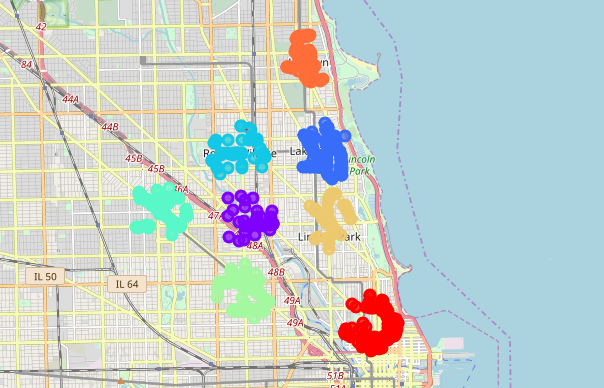

In [98]:
ten_most_common = pd.Series(df_food_bus.groupby('Business Category').id.count()).nlargest(10)
ten_most_common


Business Category
Pizza         52
Mexican       41
Sandwiches    35
Bakery        28
Italian       28
American      27
Sushi         27
Café          25
Breakfast     23
Restaurant    23
Name: id, dtype: int64

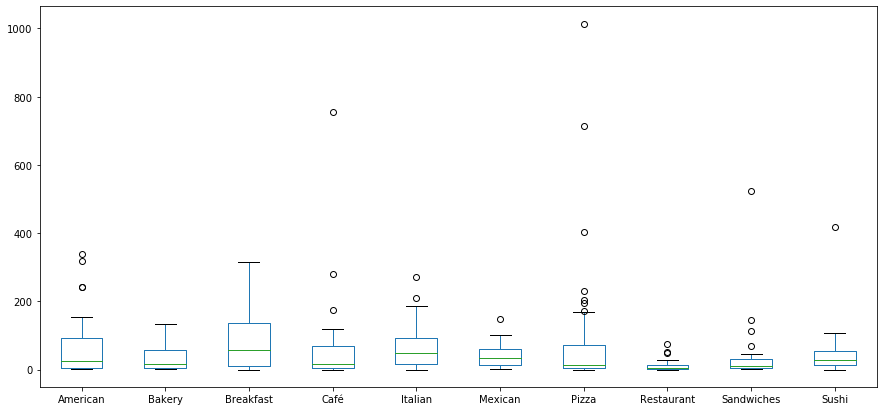

In [128]:
ten_mc_df = df_food_bus[df_food_bus['Business Category'].isin(ten_most_common.index)].loc[:,['Business Category','Likes']]
df2 = ten_mc_df.pivot(columns=ten_mc_df.columns[0], index=ten_mc_df.index)
df2.columns = df2.columns.droplevel()
df2.boxplot(figsize=(15,7), grid=False)


In [121]:
ten_most_liked = pd.Series(df_food_bus.groupby('Business Category').Likes.sum()).nlargest(10)
ten_most_liked

Business Category
Pizza           4314
Tacos           2928
Hot Dogs        2833
New American    2262
Breakfast       2006
American        1963
Italian         1903
Café            1828
Steakhouse      1817
Mexican         1680
Name: Likes, dtype: int64

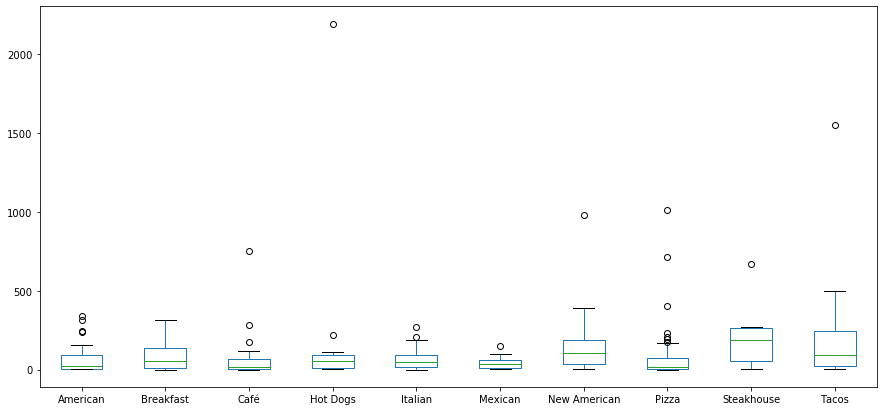

In [129]:
ten_likes_df = df_food_bus[df_food_bus['Business Category'].isin(ten_most_liked.index)].loc[:,['Business Category','Likes']]
df3 = ten_likes_df.pivot(columns=ten_likes_df.columns[0], index=ten_likes_df.index)
df3.columns = df3.columns.droplevel()
df3.boxplot(figsize=(15,7), grid=False)

In [123]:
ten_most_liked_outlier = pd.Series(df_food_bus[df_food_bus['Likes'] < 500].groupby('Business Category').Likes.sum()).nlargest(10)
ten_most_liked_outlier

Business Category
Pizza                 2587
Breakfast             2006
American              1963
Italian               1903
Mexican               1680
BBQ                   1442
Tacos                 1375
Sushi                 1305
New American          1283
Vegetarian / Vegan    1261
Name: Likes, dtype: int64

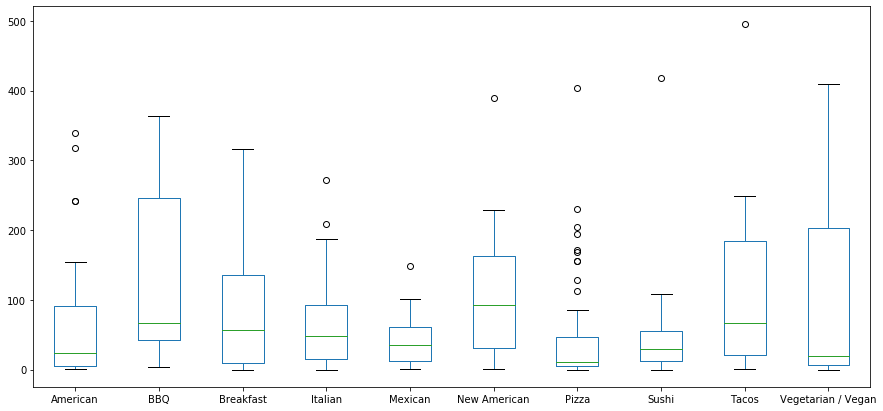

In [127]:
ten_likes_df_outlier = df_food_bus[df_food_bus['Business Category'].isin(ten_most_liked_outlier.index)].loc[:,['Business Category','Likes']]
ten_likes_df_outlier = ten_likes_df_outlier[ten_likes_df_outlier['Likes'] < 500]
df4 = ten_likes_df_outlier[ten_likes_df_outlier['Likes'] < 500].pivot(columns=ten_likes_df_outlier.columns[0], index=ten_likes_df_outlier.index)
df4.columns = df4.columns.droplevel()
df4.boxplot(figsize=(15,7), grid=False)

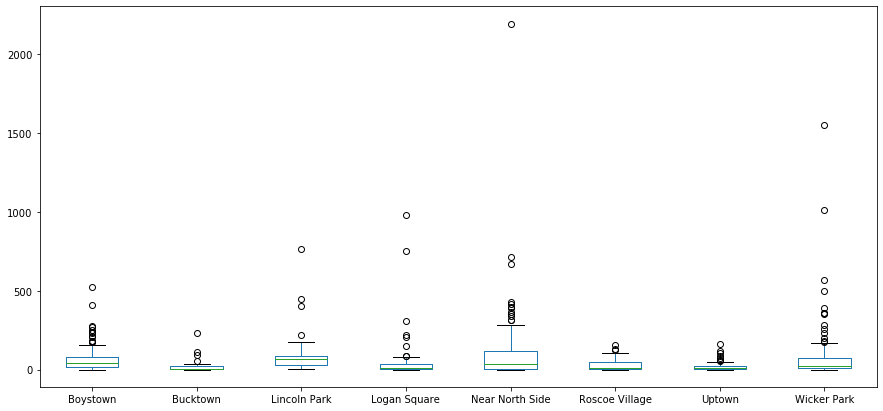

In [130]:
by_area = df_food_bus.loc[:,['Location','Likes']]
df5 = by_area.pivot(columns=by_area.columns[0], index=by_area.index)
df5.columns = df5.columns.droplevel()
df5.boxplot(figsize=(15,7), grid=False)

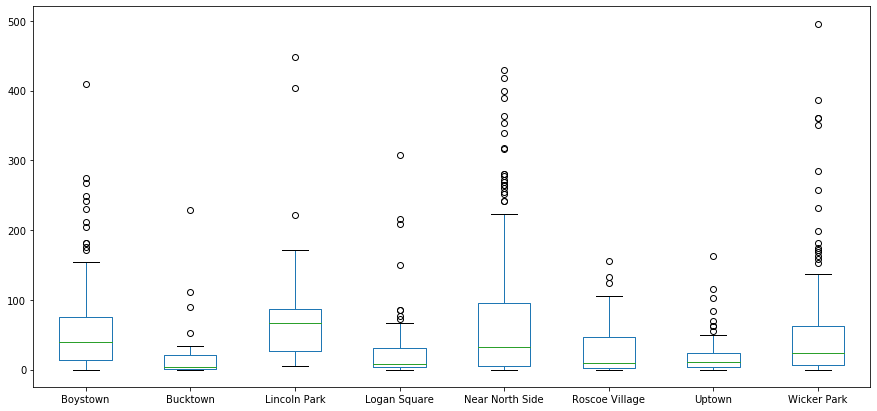

In [131]:
by_area_outlier = by_area[by_area['Likes'] < 500]
df6 = by_area_outlier.pivot(columns=by_area_outlier.columns[0], index=by_area_outlier.index)
df6.columns = df6.columns.droplevel()
df6.boxplot(figsize=(15,7), grid=False)